# Time Series Forecasting

Time series forecasting refers to predicting an output over a sequence of time. Through
analyzing past trends, different techniques of machine learning are being developed to predict
the future. Time series forecasting is a difficult type of predictive modeling problem. The
complexity comes from the fact that there is a sequence dependency among the input variables
of time series data. There are 4 different types of time series data as seasonal, cyclical, seasonal and irregular.
Depending on the data and its quantity, an appropriate model has to be selected for forecasting a time series data. 


## Objective

In this work, univariate weather forecasting model is developed. 
The Weather Dataset is a time-series dataset with per-hour information about the weather condition at a particular location. 

In this notebook, I am practicing my skills in:
* Panda/Python
Advanced machine learning models:
* Long Short Term Memory(LSTM) 
* Gated Recurrent Units(GRU)
* Convolutional Neural Network (CNN)

## Resources

* The data for this notebook can be found at Kaggle (https://www.kaggle.com/datasets/mnassrib/jena-climate?select=jena_climate_2009_2016.csv)
* A tutorial from Greg Hugg using this dataset can be found in you Tube (https://www.youtube.com/watch?v=kGdbPnMCdOg&t=1510s)


## Content

* Libraries & Packages
* Data Preperation
* Long Short Term Memory(LSTM)
* Avanced Machine Learning Models 
   - Gated Recurrent Units(GRU)
   - Convolutional Neural Network (CNN)

## Libraries and Packages 

In [16]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.layers import Conv1D
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [17]:
df = pd.read_csv("jena_climate_2009_2016.csv")

In [18]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [19]:
# Let's take data of only every hour instead of including all data of every 10 minutes
df = df[5::6]
df.index = pd.to_datetime(df['Date Time'], format = "%d.%m.%Y %H:%M:%S")
temp = df['T (degC)']

In [20]:
temp.head()

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
Name: T (degC), dtype: float64

## Data Preperation (for advance models forecasting)

Before machine learning can be used, time series forecasting problems must be re-framed as supervised learning problems. 
From a sequence to pairs of input and output sequences. 

In [21]:
def prepare_data(df, step):
    df_as_numpy = df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_numpy)-step):
        rows = [[a] for a in df_as_numpy[i:i+step]]
        x.append(rows)
        label = df_as_numpy[i+step]
        y.append(label)
    return np.array(x), np.array(y)

In [22]:
x1, y1 = prepare_data(temp, 5)

In [23]:
def train_val_test_data(x, y, df):
    train = int(len(x)*0.7)
    val = int(len(x)*0.85)
    test = int(len(x))

    x_train, y_train = x[:train], y[:train]
    x_val, y_val = x[train:val], y[train:val]
    x_test, y_test = x[val:test], y[val:test]


    dates_train = df[0:train]
    dates_val = df[train:val]
    dates_test = df[val:test]
    
    return x_train, y_train, x_val, y_val, x_test, y_test

In [24]:
x_train1, y_train1, x_val1, y_val1, x_test1, y_test1 = train_val_test_data(x1, y1, temp)

## Advance Machine Learning Model

## Recurrent Neural Network Models (RNNs)
### Long Short-Term Memory (LSTM)

- Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) model developed due to the vanishing gradient problem in traditional RNNs. LSTM method is used to capture long term dependencies and non-linear patterns in the data. LSTM models are trained according to backpropagation through time which reduces the vanishing gradient problem to optimize the network parameters. 
- LSTM networks contain memory cells that allow them to retain information over time. Each LSTM cell has 3 gates as forget gate, input gate and output gate. Through forget gate, it will forget unimportant information since it determines which information is considered as important information. In the input gate new information will be added to the LSTM cell. The output gate also provides us with the final prediction of model. LSTM can be successfully directed for multivariate time series forecasting. Due to its liability to retain the information over long sequence of data, 

In [25]:
def LSTM_Forecasting(x_train, y_train, x_val, y_val, x_test):
    model = Sequential()
    model.add(LSTM(units = 64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(LSTM(units = 64, return_sequences=True))
    model.add(LSTM(units = 64))
    model.add(Dense(units = 32, activation = 'linear'))
    model.add(Dense(1)) 
    
    model.compile(loss='mse',
                   optimizer=Adam(learning_rate=0.0001),
                   metrics=['mean_absolute_error'])
    
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)
    model.summary()
    
    forecast = model.predict(x_test).flatten()    
    
    return forecast

In [26]:
lstm_forecast = LSTM_Forecasting(x_train1, y_train1, x_val1, y_val1, x_test1)


Epoch 1/10


1534/1534 [==============================] - 15s 7ms/step - loss: 17.2049 - mean_absolute_error: 2.5212 - val_loss: 1.9531 - val_mean_absolute_error: 0.9516
Epoch 2/10
1534/1534 [==============================] - 9s 6ms/step - loss: 1.5609 - mean_absolute_error: 0.8499 - val_loss: 1.0383 - val_mean_absolute_error: 0.6755
Epoch 3/10
1534/1534 [==============================] - 9s 6ms/step - loss: 1.0612 - mean_absolute_error: 0.6995 - val_loss: 0.8907 - val_mean_absolute_error: 0.6376
Epoch 4/10
1534/1534 [==============================] - 9s 6ms/step - loss: 0.8465 - mean_absolute_error: 0.6311 - val_loss: 0.8018 - val_mean_absolute_error: 0.6053
Epoch 5/10
1534/1534 [==============================] - 9s 6ms/step - loss: 0.7731 - mean_absolute_error: 0.6043 - val_loss: 0.8244 - val_mean_absolute_error: 0.6289
Epoch 6/10
1534/1534 [==============================] - 9s 6ms/step - loss: 0.7258 - mean_absolute_error: 0.5848 - val_loss: 0.6926 - val_mean_absolute_error: 0.5615

In [27]:
def plot_lstm_prediction(lstm_forecast, y , start=0, end=100):
    results = pd.DataFrame(data={'Predictions':lstm_forecast, 'Actuals':y})
    plt.plot(results['Predictions'][start:end])
    plt.plot(results['Actuals'][start:end])
    
    return results, mse(lstm_forecast, y)

(       Predictions  Actuals
 0         6.358713     6.47
 1         6.319620     6.39
 2         6.219374     6.43
 3         6.324751     6.15
 4         5.893490     6.26
 ...            ...      ...
 10508    -1.019910    -0.98
 10509    -1.564273    -1.40
 10510    -1.764653    -2.75
 10511    -3.277001    -2.89
 10512    -3.204315    -3.93
 
 [10513 rows x 2 columns],
 0.5863102029547349)

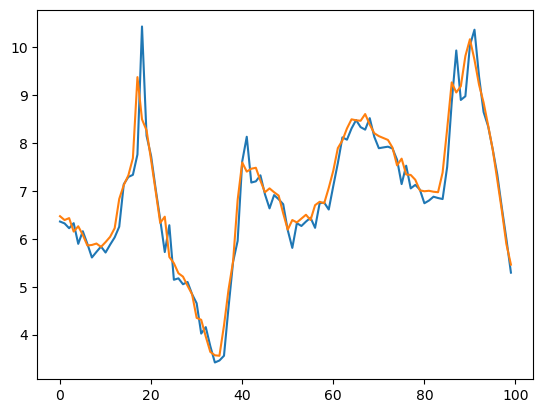

In [28]:
plot_lstm_prediction(lstm_forecast, y_test1)

### Gated Recurrent Unit (GRU) Model

- LSTM model is particularly applicable for time series forecasting including stock market forecasting. However, they require a large amount of data and can be computationally very expensive to use. Gated Recurrent Unit (GRU) is a type of RNNs and simpler variation of LSTM model with simpler architecture aimed to decrease the computational complexity and memory requirements of LSTM networks. GRU network contains fewer parameters and update gate and reset gate. The flow of information is controlled through how much of the previously hidden information to keep and how much new information to include. Thus, the combination of input and forget gate from LSTM has been converted into one update gate. Despite its similarities to LSTM, GRU is demonstrated to achieve similar performance as LSTM.

In [29]:
def GRU_Forecasting(x_train, y_train, x_val, y_val, x_test):
    model = Sequential()
    model.add(GRU(units = 64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(GRU(units = 64, return_sequences=True))
    model.add(GRU(units = 64))
    model.add(Dense(units = 32, activation = 'linear'))
    model.add(Dense(1)) 
    
    model.compile(loss='mse',
                   optimizer=Adam(learning_rate=0.0001),
                   metrics=['mean_absolute_error'])
    
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)
    model.summary()
    
    forecast = model.predict(x_test).flatten()    
    
    return forecast

In [30]:
gru_forecast = GRU_Forecasting(x_train1, y_train1, x_val1, y_val1, x_test1)

Epoch 1/10
1534/1534 [==============================] - 14s 6ms/step - loss: 14.3707 - mean_absolute_error: 2.0031 - val_loss: 1.2186 - val_mean_absolute_error: 0.6936
Epoch 2/10
1534/1534 [==============================] - 9s 6ms/step - loss: 0.9020 - mean_absolute_error: 0.6416 - val_loss: 0.7944 - val_mean_absolute_error: 0.5926
Epoch 3/10
1534/1534 [==============================] - 8s 6ms/step - loss: 0.7392 - mean_absolute_error: 0.5879 - val_loss: 0.7255 - val_mean_absolute_error: 0.5798
Epoch 4/10
1534/1534 [==============================] - 9s 6ms/step - loss: 0.6847 - mean_absolute_error: 0.5657 - val_loss: 0.6778 - val_mean_absolute_error: 0.5486
Epoch 5/10
1534/1534 [==============================] - 9s 6ms/step - loss: 0.6624 - mean_absolute_error: 0.5547 - val_loss: 0.6673 - val_mean_absolute_error: 0.5440
Epoch 6/10
1534/1534 [==============================] - 9s 6ms/step - loss: 0.6571 - mean_absolute_error: 0.5530 - val_loss: 0.7862 - val_mean_absolute_error: 0.6261
Ep

In [31]:
def plot_gru_prediction(gru_forecast, y , start=0, end=100):
    results = pd.DataFrame(data={'Predictions':gru_forecast, 'Actuals':y})
    plt.plot(results['Predictions'][start:end])
    plt.plot(results['Actuals'][start:end])
    
    return results, mse(gru_forecast, y)

(       Predictions  Actuals
 0         6.568927     6.47
 1         6.541241     6.39
 2         6.430118     6.43
 3         6.525275     6.15
 4         6.102142     6.26
 ...            ...      ...
 10508    -1.322740    -0.98
 10509    -1.427955    -1.40
 10510    -1.523229    -2.75
 10511    -3.147815    -2.89
 10512    -3.207841    -3.93
 
 [10513 rows x 2 columns],
 0.5557065727005259)

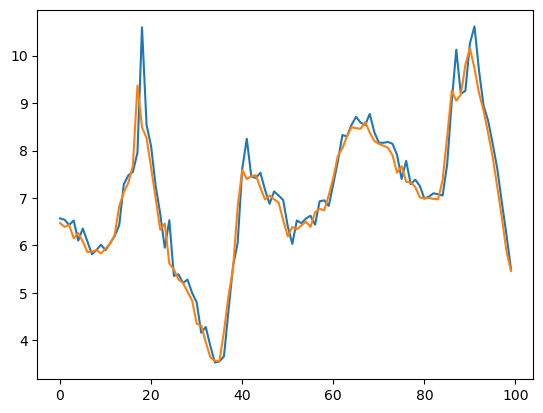

In [32]:
plot_gru_prediction(gru_forecast, y_test1)

## Concolutional Neural Network (1d-CNN)

- CNNs (Convolutional Neural Networks) are primarily associated with image processing tasks, but they have also been applied to time series forecasting with some success. The effectiveness of CNNs for time series forecasting depends on factors like the complexity of the data 

In [33]:
def CNN_Forecasting(x_train, y_train, x_val, y_val, x_test):
    model = Sequential()
    model.add(Conv1D(filters = 64, kernel_size = 3, input_shape = (x_train.shape[1], x_train.shape[2])))
    model.add(Flatten())
    
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))  
    
    model.compile(loss='mse',
                   optimizer=Adam(learning_rate=0.0001),
                   metrics=['mean_absolute_error'])
    
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)
    model.summary()
    
    forecast = model.predict(x_test).flatten()
    
    return forecast

In [34]:
cnn_forecast = CNN_Forecasting(x_train1, y_train1, x_val1, y_val1, x_test1)

Epoch 1/10
1534/1534 [==============================] - 3s 1ms/step - loss: 6.1781 - mean_absolute_error: 1.5844 - val_loss: 1.9010 - val_mean_absolute_error: 0.9650
Epoch 2/10
1534/1534 [==============================] - 2s 1ms/step - loss: 1.4338 - mean_absolute_error: 0.8336 - val_loss: 1.1640 - val_mean_absolute_error: 0.7468
Epoch 3/10
1534/1534 [==============================] - 2s 1ms/step - loss: 1.0163 - mean_absolute_error: 0.6948 - val_loss: 0.9016 - val_mean_absolute_error: 0.6478
Epoch 4/10
1534/1534 [==============================] - 2s 1ms/step - loss: 0.8303 - mean_absolute_error: 0.6235 - val_loss: 0.7847 - val_mean_absolute_error: 0.5987
Epoch 5/10
1534/1534 [==============================] - 2s 1ms/step - loss: 0.7495 - mean_absolute_error: 0.5895 - val_loss: 0.7505 - val_mean_absolute_error: 0.5825
Epoch 6/10
1534/1534 [==============================] - 2s 1ms/step - loss: 0.7109 - mean_absolute_error: 0.5718 - val_loss: 0.7103 - val_mean_absolute_error: 0.5655
Epoc

In [35]:
def plot_cnn_prediction(cnn_forecast, y , start=0, end=100):
    results = pd.DataFrame(data={'Predictions':cnn_forecast, 'Actuals':y})
    plt.plot(results['Predictions'][start:end])
    plt.plot(results['Actuals'][start:end])
    
    return results, mse(cnn_forecast, y)

(       Predictions  Actuals
 0         6.556070     6.47
 1         6.517912     6.39
 2         6.420717     6.43
 3         6.510497     6.15
 4         6.108691     6.26
 ...            ...      ...
 10508    -1.439851    -0.98
 10509    -1.687100    -1.40
 10510    -1.579757    -2.75
 10511    -3.098475    -2.89
 10512    -3.194112    -3.93
 
 [10513 rows x 2 columns],
 0.5845767724248272)

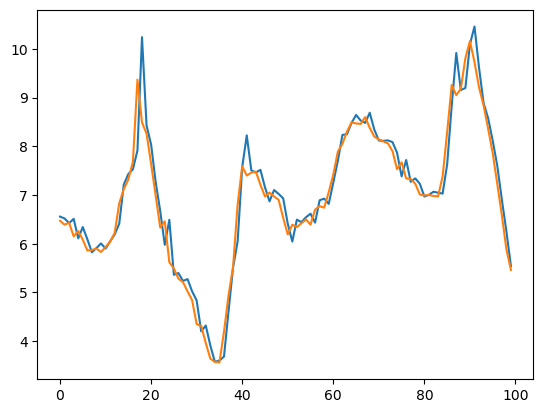

In [36]:
plot_cnn_prediction(cnn_forecast, y_test1)

## Conclusion
- Comparison of the models for forecasting the time series weather dataset show GRU model performs better due to less error as sompared with CNN and LSTM models. 
- For univariate dataset, there is no need to use the complex LSTM model as compared with GRU. 
- In the future work, I will focus on comparing the various machine learning models in their forecasting efficiency depending on the complexity of data. Multivariate forecasting wll be investigated as a result to evaluate the effect of complexity of data on model selection.  